In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("student_exam_scores_large.csv")
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
#from sklearn.model_selection import 
import numpy as np
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib.backends.registry'

In [3]:
df.head()

,Hours_Studied,Attendance_Rate,Exam_Score
0,5.6,88.4,53.7
1,2.9,99.1,45.3
2,6.5,85.9,62.4
3,6.9,91.4,59.9
4,1.1,64.5,27.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Hours_Studied    200 non-null    float64
 1   Attendance_Rate  200 non-null    float64
 2   Exam_Score       200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [5]:
df.describe()

,Hours_Studied,Attendance_Rate,Exam_Score
count,200.000000,200.000000,200.000000
mean,4.937500,84.864500,49.801000
std,1.750389,9.550984,10.132147
min,1.000000,59.300000,26.200000
25%,3.700000,78.000000,41.975000
50%,4.900000,85.600000,50.100000
75%,6.100000,91.400000,56.800000
max,10.000000,100.000000,75.000000


## Problem statement
Predicting Students score


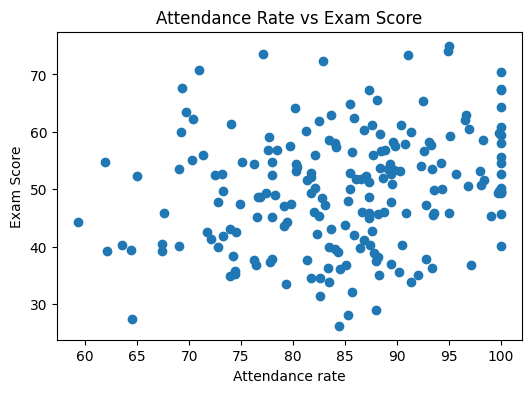

In [6]:
plt.figure(figsize = (6, 4))
plt.scatter(df['Attendance_Rate'], df['Exam_Score'])
plt.title('Attendance Rate vs Exam Score')
plt.xlabel('Attendance rate')
plt.ylabel('Exam Score')
plt.show()

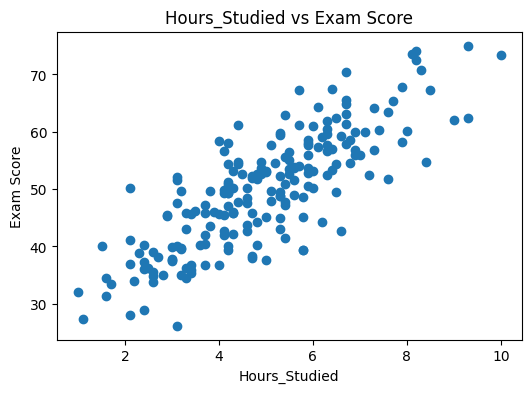

In [7]:
plt.figure(figsize = (6, 4))
plt.scatter(df['Hours_Studied'], df['Exam_Score'])
plt.title('Hours_Studied vs Exam Score')
plt.xlabel('Hours_Studied')
plt.ylabel('Exam Score')
plt.show()

In [8]:
df.corr()['Exam_Score']

Hours_Studied      0.814611
Attendance_Rate    0.217725
Exam_Score         1.000000
Name: Exam_Score, dtype: float64

In [9]:
pearsonr(df['Hours_Studied'], df['Exam_Score'])

PearsonRResult(statistic=np.float64(0.8146114441941504), pvalue=np.float64(1.0018546125040096e-48))

In [10]:
pearsonr(df['Attendance_Rate'], df['Exam_Score'])

PearsonRResult(statistic=np.float64(0.21772506193508928), pvalue=np.float64(0.0019546549785690597))

In [11]:
# fit a lineat regressionl
lr_model = LinearRegression()

In [12]:
X = df[['Hours_Studied']]
Y = df['Exam_Score']

In [13]:
df[['Hours_Studied']]

,Hours_Studied
0,5.6
1,2.9
2,6.5
3,6.9
4,1.1
...,...
195,3.2
196,6.3
197,4.2
198,5.0


In [14]:
lr_model.fit(X, Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
df['Hours_Studied'].values.reshape(-1,1) 

array([[ 5.6],
       [ 2.9],
       [ 6.5],
       [ 6.9],
       [ 1.1],
       [ 2.4],
       [ 5.3],
       [ 4.4],
       [ 5. ],
       [ 3.3],
       [ 6.8],
       [ 6.6],
       [ 5.1],
       [ 7.3],
       [ 5.9],
       [ 3.3],
       [ 5.7],
       [ 3.1],
       [ 6.8],
       [ 4.9],
       [ 4.6],
       [ 3.6],
       [ 7.4],
       [ 4.7],
       [ 4.1],
       [ 4.3],
       [ 6.1],
       [ 5.7],
       [ 5.8],
       [ 5.9],
       [ 9.3],
       [ 4.2],
       [ 4. ],
       [ 3.4],
       [ 6.2],
       [ 7.3],
       [ 4.8],
       [ 3.3],
       [ 3.4],
       [ 6.3],
       [ 6.5],
       [ 6.1],
       [ 3.7],
       [ 5.5],
       [ 5.2],
       [ 5.4],
       [ 6.7],
       [ 5.4],
       [ 6.4],
       [ 5.1],
       [ 5.6],
       [ 6.3],
       [ 2.1],
       [ 4.4],
       [ 4.1],
       [ 3.7],
       [ 4.4],
       [ 8. ],
       [ 3.3],
       [ 6.9],
       [ 1.6],
       [ 4.3],
       [ 5.3],
       [ 6.2],
       [ 6.4],
       [ 6.6],
       [ 4

In [16]:
lr_model.predict([[20]])

c:\Users\DELL\Desktop\New folder\envs\pythonALX\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([120.82651141])

In [17]:
m = lr_model.coef_
m

array([4.71538665])

In [18]:
c = lr_model.intercept_
c

np.float64(26.518778416744063)

In [19]:
m * 4.5 + c


array([47.73801834])

In [20]:
df[['Exam_Score', 'Hours_Studied']]

,Exam_Score,Hours_Studied
0,53.7,5.6
1,45.3,2.9
2,62.4,6.5
3,59.9,6.9
4,27.4,1.1
...,...,...
195,39.8,3.2
196,56.6,6.3
197,51.3,4.2
198,53.2,5.0


In [21]:
y_pred = lr_model.predict(X)
y_pred 

array([52.92494366, 40.1933997 , 57.16879164, 59.0549463 , 31.70570373,
       37.83570638, 51.51032766, 47.26647968, 50.09571167, 42.07955436,
       58.58340764, 57.64033031, 50.56725033, 60.94110096, 54.33955965,
       42.07955436, 53.39648232, 41.13647703, 58.58340764, 49.624173  ,
       48.20955701, 43.49417036, 61.41263963, 48.68109567, 45.85186368,
       46.79494101, 55.28263698, 53.39648232, 53.86802099, 54.33955965,
       70.37187426, 46.32340235, 45.38032502, 42.55109303, 55.75417565,
       60.94110096, 49.15263434, 42.07955436, 42.55109303, 56.22571431,
       57.16879164, 55.28263698, 43.96570902, 52.45340499, 51.038789  ,
       51.98186633, 58.11186897, 51.98186633, 56.69725298, 50.56725033,
       52.92494366, 56.22571431, 36.42109038, 47.26647968, 45.85186368,
       43.96570902, 47.26647968, 64.24187161, 42.07955436, 59.0549463 ,
       34.06339706, 46.79494101, 51.51032766, 55.75417565, 56.69725298,
       57.64033031, 46.79494101, 45.85186368, 58.11186897, 48.20

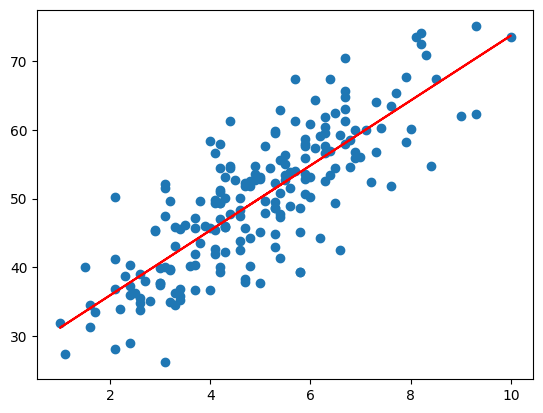

In [22]:
plt.scatter(X,Y, label = 'Data')
plt.plot(X, y_pred, color= 'red', label = " line of best fit")
plt.show()

In [23]:
lr_model.predict([[4]])

c:\Users\DELL\Desktop\New folder\envs\pythonALX\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([45.38032502])

In [24]:
#### Train test split

In [25]:
df.head()

,Hours_Studied,Attendance_Rate,Exam_Score
0,5.6,88.4,53.7
1,2.9,99.1,45.3
2,6.5,85.9,62.4
3,6.9,91.4,59.9
4,1.1,64.5,27.4


In [26]:
x = df[['Hours_Studied']]
y = df[['Exam_Score']]

In [27]:
# to split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'train_test_split' is not defined

In [ ]:
# fit and train model with the training data
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
def evaluate_model(y_true, y_pred):
    
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse =np.sqrt(y_true, y_pred)


    return r2,mae,mse,rmse

In [ ]:
evaluate_model(y_train, y_train_pred)

(0.6593179866868724,
 4.646334477112401,
 34.20235219339494,
      Exam_Score
 79     7.823043
 197    7.162402
 38     5.983310
 24     6.480741
 122    7.930952
 ..          ...
 106    7.218033
 14     7.266361
 92     7.021396
 179    7.334848
 102    6.774954
 
 [160 rows x 1 columns])

In [ ]:
# evaluate the model on the test data

evaluate_model(y_test, y_test_pred)

(0.6752906629968904,
 4.704394453850045,
 35.11039645857477,
      Exam_Score
 95     6.418723
 15     6.774954
 30     7.893035
 158    6.058052
 128    6.473021
 115    6.782330
 69     6.618157
 170    6.058052
 174    6.348228
 45     6.434283
 66     6.782330
 182    6.332456
 165    7.042727
 78     7.771744
 186    6.913754
 177    7.231874
 56     7.375636
 152    5.787918
 82     7.078135
 68     8.049845
 124    8.390471
 16     7.823043
 148    7.739509
 93     6.655825
 65     7.694154
 60     5.873670
 84     5.907622
 67     7.523297
 125    7.348469
 132    7.245688
 9      5.873670
 18     7.648529
 55     6.870226
 75     7.543209
 150    7.204165
 104    5.118594
 135    6.316645
 137    8.099383
 164    7.937254
 76     7.021396)

## residual analysis

In [28]:
residuals = y_test - y_test_pred
residuals

NameError: name 'y_test' is not defined

<Axes: ylabel='Count'>

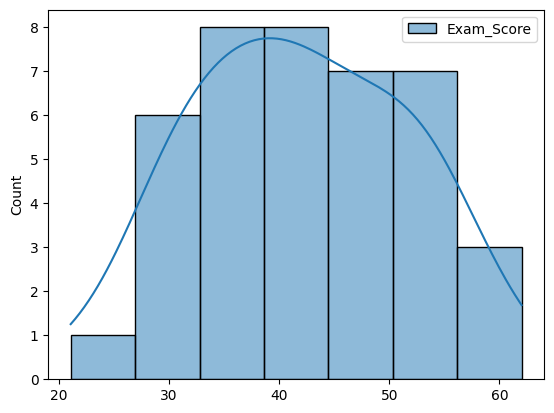

In [ ]:
sns.histplot(residuals, kde = True)

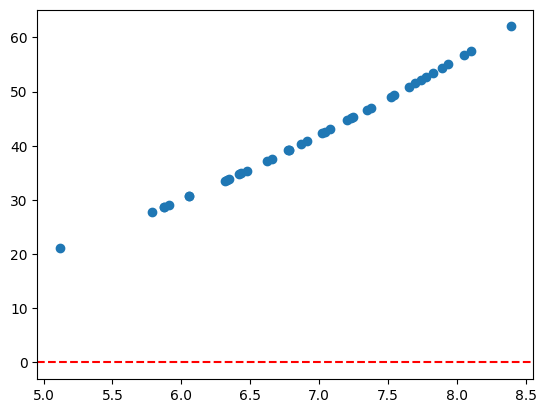

In [ ]:
plt.scatter(y_test_pred, residuals)
plt.axhline(y = 0, color = 'r', linestyle = "--")
plt.show()